In [1]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

### Ik verwacht niet dat er een duidelijke correlatie is tussen species en geslacht.

<AxesSubplot:xlabel='species'>

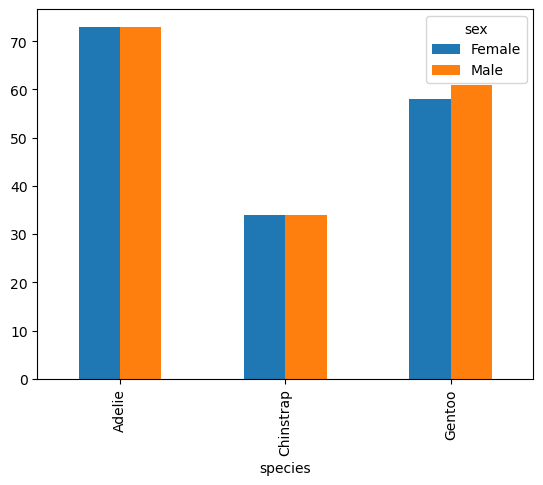

In [6]:
penguinsContingencyTable = create_contingency_table(penguins, 'sex','species')
penguinsContingencyTable.plot(kind='bar')

In [7]:
from scipy.stats import chi2_contingency
def chi_squared_test(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [8]:
chi_squared_test(penguins, 'sex','species')

The odds of a correlation between sex and species is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


### Ik verwacht niet dat er een duidelijke correlatie is tussen sex en island.

<AxesSubplot:xlabel='island'>

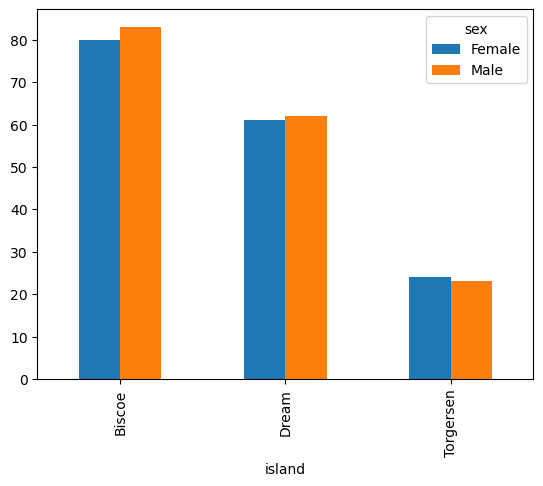

In [12]:
penguinsContingencyTable2 = create_contingency_table(penguins, 'sex','island')
penguinsContingencyTable2.plot(kind='bar')

In [11]:
chi_squared_test(penguins, 'sex','island')

The odds of a correlation between sex and island is 2.8388770718934975% (Based on a p value of 0.971611229281065).
This percentage needs to be at least 95% for a significant correlation.
